In [2]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn # 인공 신경망 모델들 모아놓은 모듈
import torch.nn.functional as F #그중 자주 쓰이는것들을 F로
from torchvision import transforms, datasets
import cv2
import pandas as pd
import os
from glob import glob
import torchvision.models as models
import sys
import librosa, librosa.display 

from pytorchtools.pytorchtools import EarlyStopping # 현재 폴더에 추가된 모듈.


if torch.cuda.is_available():
    DEVICE = torch.device('cuda')
else:
    DEVICE = torch.device('cpu')
#DEVICE = torch.device('cpu')
print('Using Pytorch version : ',torch.__version__,' Device : ',DEVICE)

Using Pytorch version :  1.9.0  Device :  cuda


In [3]:
#시각화 패키지들
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use("ggplot")

In [4]:
# 파일 불러오기
train = pd.read_csv('./data/train_std.csv')
test = pd.read_csv('./data/test_std.csv')
submission = pd.read_csv('./data/sample_submission.csv')

# 2D space 축소


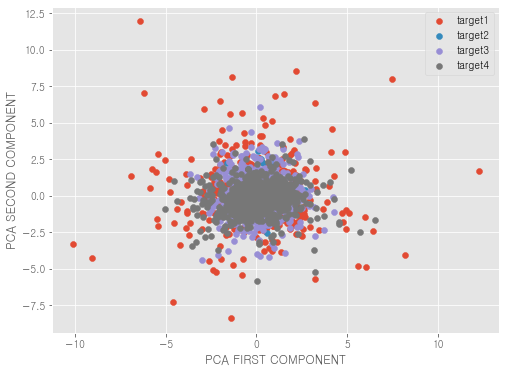

In [9]:
# PCA 구현
# 1. 2D SPACE 축소
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA


pca2=PCA(n_components=2)
pca2.fit(train)
pca2_data=pca2.transform(train)
pca2_df=pd.DataFrame(pca2_data,columns=['PCA1','PCA2'])


fig =plt.figure(figsize=(8,6))
target1= pca2_df[train['target']==0] 
target2 = pca2_df[train['target']==1]
target3= pca2_df[train['target']==2] 
target4 = pca2_df[train['target']==3]

plt.scatter(target1.iloc[:,0],target1.iloc[:,1],label='target1')
plt.scatter(target2.iloc[:,0],target2.iloc[:,1],label='target2')
plt.scatter(target3.iloc[:,0],target3.iloc[:,1],label='target3')
plt.scatter(target4.iloc[:,0],target4.iloc[:,1],label='target4')

plt.xlabel('PCA FIRST COMPONENT')
plt.ylabel('PCA SECOND COMPONENT')
plt.legend()
plt.show()




target1이 좀 더 튄다는 것을 볼 수 있지만.
학습에 사용할만한 결과는 아니다.

In [6]:
pca2_df

,PCA1,PCA2
0,-0.202252,-0.180769
1,-0.208071,0.382293
2,0.190821,3.480518
3,0.117195,0.534589
4,-0.744618,2.193339
...,...,...
2330,6.473052,-1.648816
2331,1.297203,-0.976965
2332,1.312940,0.414605
2333,-0.532408,0.740795
